<a href="https://colab.research.google.com/github/Khaganshu-RK/Conversational-Chatbot/blob/insurance_fraud_detection/capstone_project_auto_insurance_project_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing required libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
from sklearn.neural_network import MLPClassifier
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv ('/content/drive/MyDrive/Projectfiles/InsuranceFraud/train(1).csv')

### Viewing Dataset

In [ ]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [ ]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Exploratory Data Analysis

####  Write at least 3 important inferences from the data above

**Insight 1**:
    
        This is a high dimensional data with 59 columns.
        So, to tackle model building part, PCA would be used.
        Directly usage of high no. of columns would lead to increase
        in execution time of models and would lead to overfitting of data.

In [ ]:
claims_dict = dict(data['target'].value_counts())
claims_total = sum(list(claims_dict.values()))
for key in claims_dict:
    claims_dict[key] = claims_dict[key]*100/claims_total
print('% of claims accepted:',claims_dict[0])
print('% of claims rejected:',claims_dict[1])

% of claims accepted: 96.35524821408171
% of claims rejected: 3.6447517859182947


**Insight 2**:
                
        The target for prediction in the data here is highly skewed towards claims being rejected by the insurance company (about 96%) and merely 4% of claims are accepted.
        It is given that as per industry estimate 1% reduction in claims leads to boost in about 10% of profit.
        So, 96% reduction in claims leads to 960% boost in profit, thus making it a highly profitable business model.

In [ ]:
new_data = data.replace(to_replace=-1,value=np.nan)
data_len = len(new_data)
null_percent_dict = dict(new_data.isnull().sum())
for i in null_percent_dict:
    null_percent_dict[i] = null_percent_dict[i]*100/len(new_data)

In [ ]:
null_percent_dict

{'id': 0.0,
 'target': 0.0,
 'ps_ind_01': 0.0,
 'ps_ind_02_cat': 0.03628959093566662,
 'ps_ind_03': 0.0,
 'ps_ind_04_cat': 0.013944611331760785,
 'ps_ind_05_cat': 0.975954785857812,
 'ps_ind_06_bin': 0.0,
 'ps_ind_07_bin': 0.0,
 'ps_ind_08_bin': 0.0,
 'ps_ind_09_bin': 0.0,
 'ps_ind_10_bin': 0.0,
 'ps_ind_11_bin': 0.0,
 'ps_ind_12_bin': 0.0,
 'ps_ind_13_bin': 0.0,
 'ps_ind_14': 0.0,
 'ps_ind_15': 0.0,
 'ps_ind_16_bin': 0.0,
 'ps_ind_17_bin': 0.0,
 'ps_ind_18_bin': 0.0,
 'ps_reg_01': 0.0,
 'ps_reg_02': 0.0,
 'ps_reg_03': 18.106489788512327,
 'ps_car_01_cat': 0.01797678810239041,
 'ps_car_02_cat': 0.0,
 'ps_car_03_cat': 69.08983689844963,
 'ps_car_04_cat': 0.0,
 'ps_car_05_cat': 44.78253126617071,
 'ps_car_06_cat': 0.0,
 'ps_car_07_cat': 1.9302366215734899,
 'ps_car_08_cat': 0.0,
 'ps_car_09_cat': 0.09559619093701067,
 'ps_car_10_cat': 0.0,
 'ps_car_11_cat': 0.0,
 'ps_car_11': 0.0008400368272145051,
 'ps_car_12': 0.000168007365442901,
 'ps_car_13': 0.0,
 'ps_car_14': 7.160473915176441,
 '

**Insight 3**:

      Only 12 columns out of 59 columns have missing values in the data, out of which *ps_car_03_cat* has more than 50% of data
      missing remaining features possess less than 50% missing data,which can be useful in futher analysis.

#### Is the data balanced? Meaning are the targets 0 and 1 in right proportion?

      No. As mentioned above, target 0 is in very high number compared to 1.

#### How many categorical features are there? How many binary features are there?

In [ ]:
col_list = list(data.columns)
var_count_dict = dict.fromkeys(['binary_var_count','categorical_var_count','continuous/ordinal_var_count'],0)
continuous_ordinal_var = []
binary_var = []
categorical_var = []
for i in col_list:
    last_3 = i[-3:]
    if last_3=='bin' or i=='target':
        var_count_dict['binary_var_count']+=1
        binary_var.append(i)
    elif last_3=='cat':
        var_count_dict['categorical_var_count']+=1
        categorical_var.append(i)
    else:
        var_count_dict['continuous/ordinal_var_count']+=1
        continuous_ordinal_var.append(i)
print(var_count_dict)

{'binary_var_count': 18, 'categorical_var_count': 14, 'continuous/ordinal_var_count': 27}


      As we can see from above, there are 18 binary features, 14 categorical features and 27 continuous/ordinal features.

#### Write inferences from data on interval, binary and ordinal variables.

In [ ]:
interval_var = []
ordinal_var = []
for i in continuous_ordinal_var:
    if data[i].dtype=='float':
        interval_var.append(i)
    else:
        if i!='id':
            ordinal_var.append(i)

In [ ]:
print('Ordinal variables:',ordinal_var)
print('\n')
print('Interval variables:',interval_var)
print('\n')
print('Binary variables:',binary_var)

Ordinal variables: ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


Interval variables: ['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03']


Binary variables: ['target', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


In [ ]:
data[ordinal_var].head()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
0,2,5,0,11,2,3,1,10,1,10,1,5,9,1,5,8
1,1,7,0,3,3,2,1,9,5,8,1,7,3,1,1,9
2,5,9,0,12,1,2,2,9,1,8,2,7,4,2,7,7
3,0,2,0,8,1,2,4,7,1,8,4,2,2,2,4,9
4,0,0,0,9,3,2,2,6,3,10,2,12,3,1,1,3


In [ ]:
data[interval_var].head()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
0,0.7,0.2,0.718070,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2
1,0.8,0.4,0.766078,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3
2,0.0,0.0,-1.000000,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1
3,0.9,0.2,0.580948,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1
4,0.7,0.6,0.840759,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0


In [ ]:
data[binary_var].head()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0
2,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


#### **Insight 1:**
      * Ordinal variables here are sort of one-hot encoded features here, which is integral in nature ranging from 0 to some integer n.
      * Interval variables appear to be of type float.
      * Binary are the ones that only take boolean values.

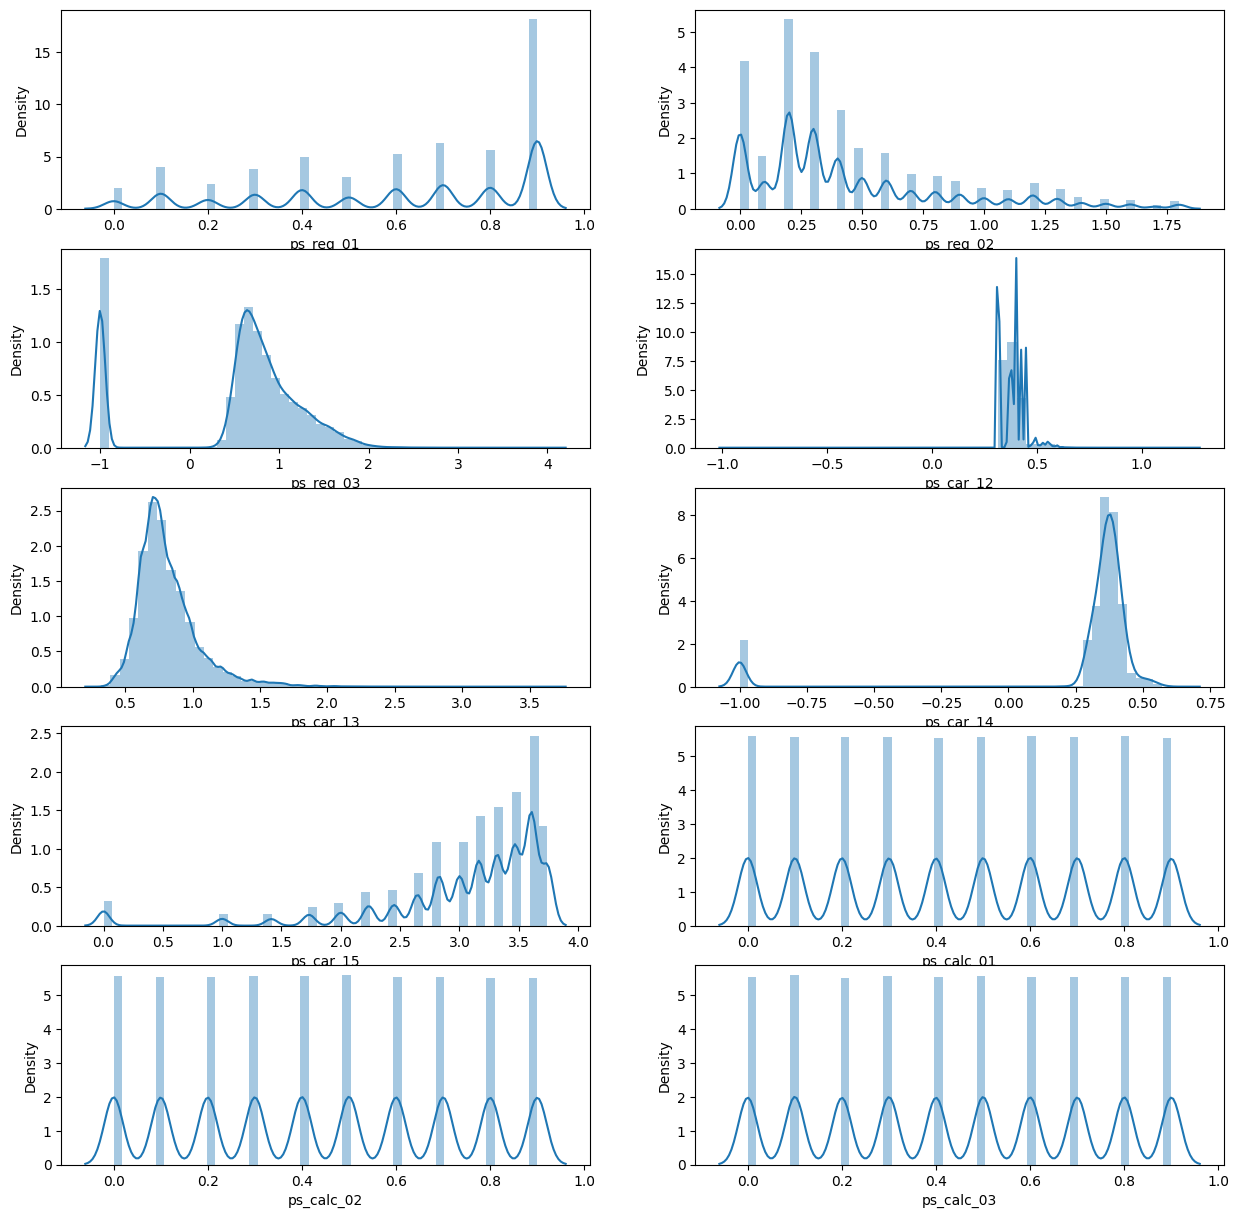

In [ ]:
#Frequency Distribution plot for Interval variables
count=1
plt.figure(figsize=(15,15))
for i in interval_var:
    plt.subplot(5,2,count)
    sns.distplot(data[i])
    count+=1

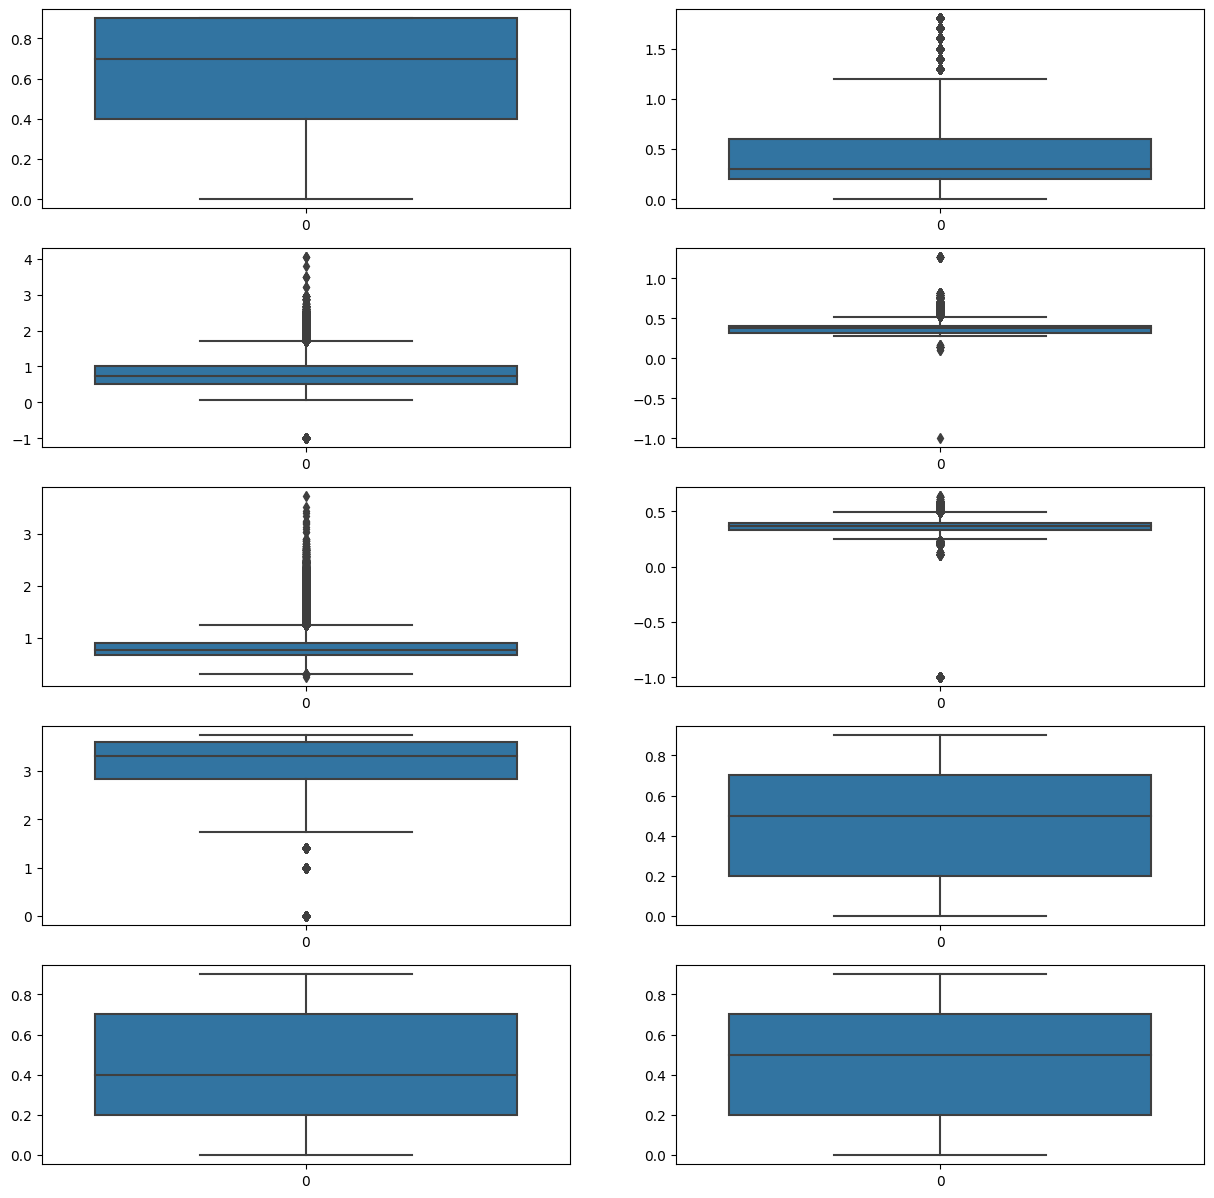

In [ ]:
#Boxplot for Interval variables.
count=1
plt.figure(figsize=(15,15))
for i in interval_var:
    plt.subplot(5,2,count)
    sns.boxplot(data[i])
    count+=1

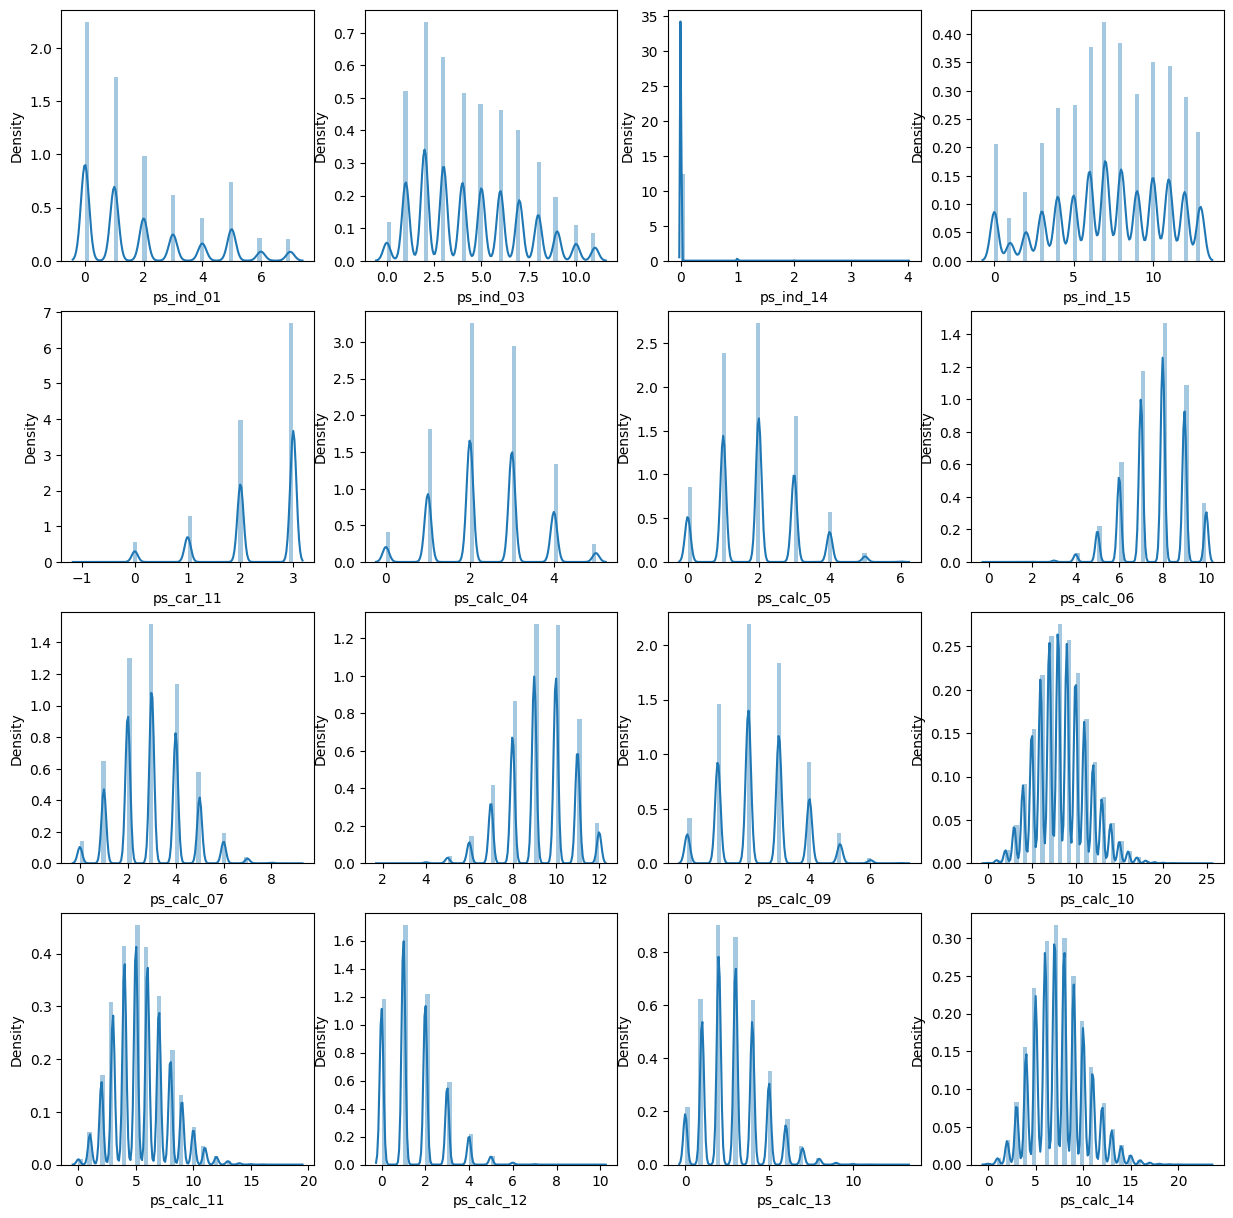

In [ ]:
#Frequency Distribution plot for Ordinal variables
count=1
plt.figure(figsize=(15,15))
for i in ordinal_var:
    plt.subplot(4,4,count)
    sns.distplot(data[i])
    count+=1

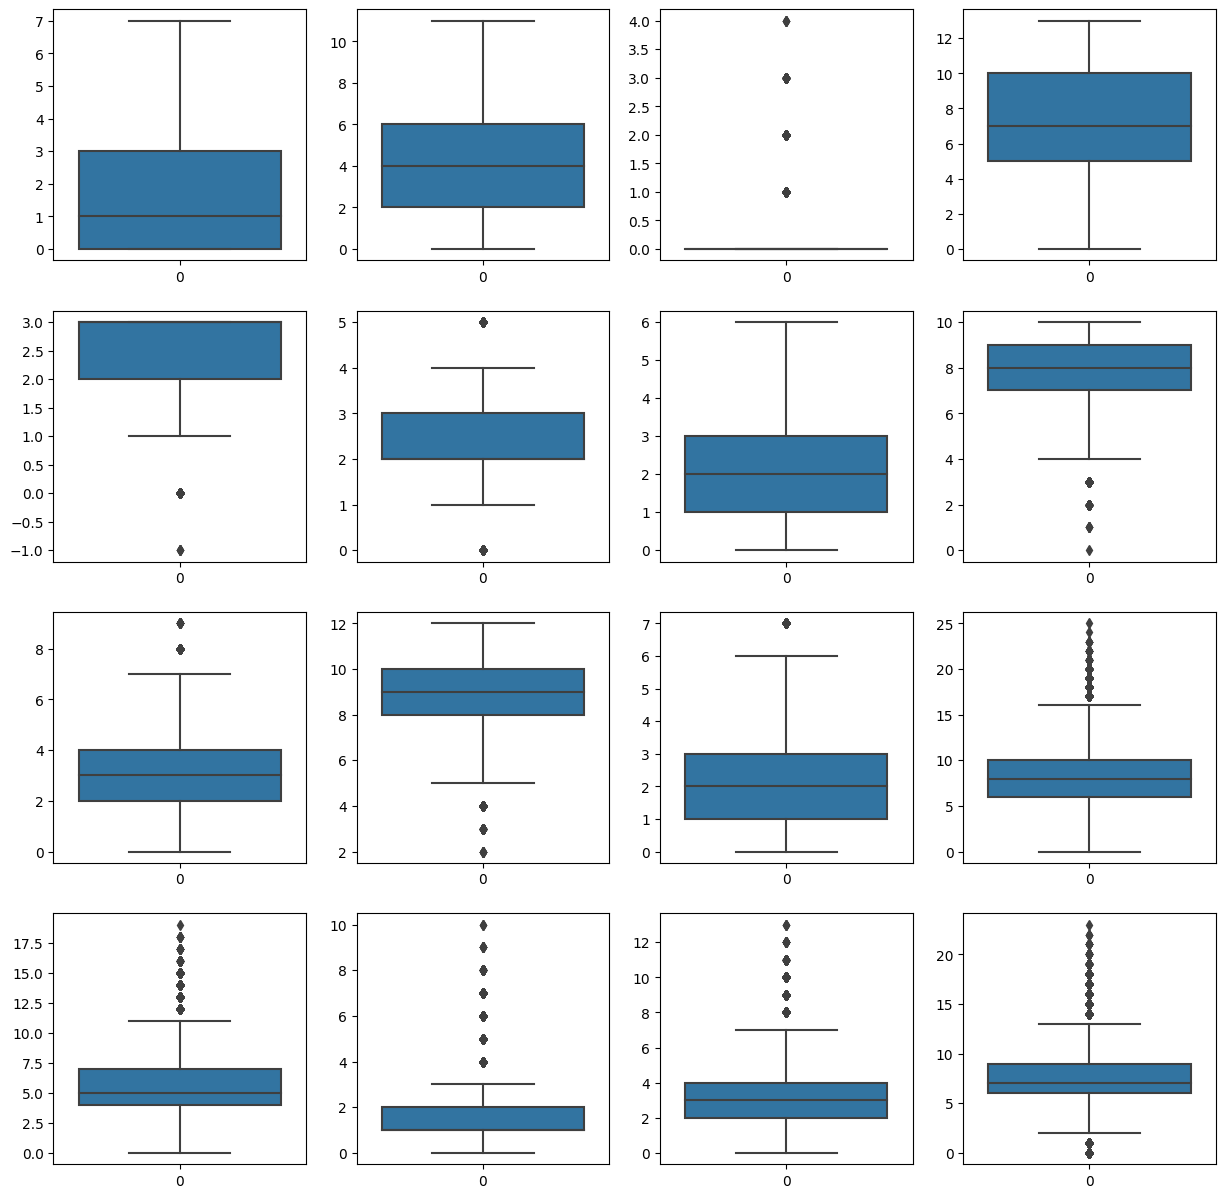

In [ ]:
#Boxplot for Ordinal variables.
count=1
plt.figure(figsize=(15,15))
for i in ordinal_var:
    plt.subplot(4,4,count)
    sns.boxplot(data[i])
    count+=1

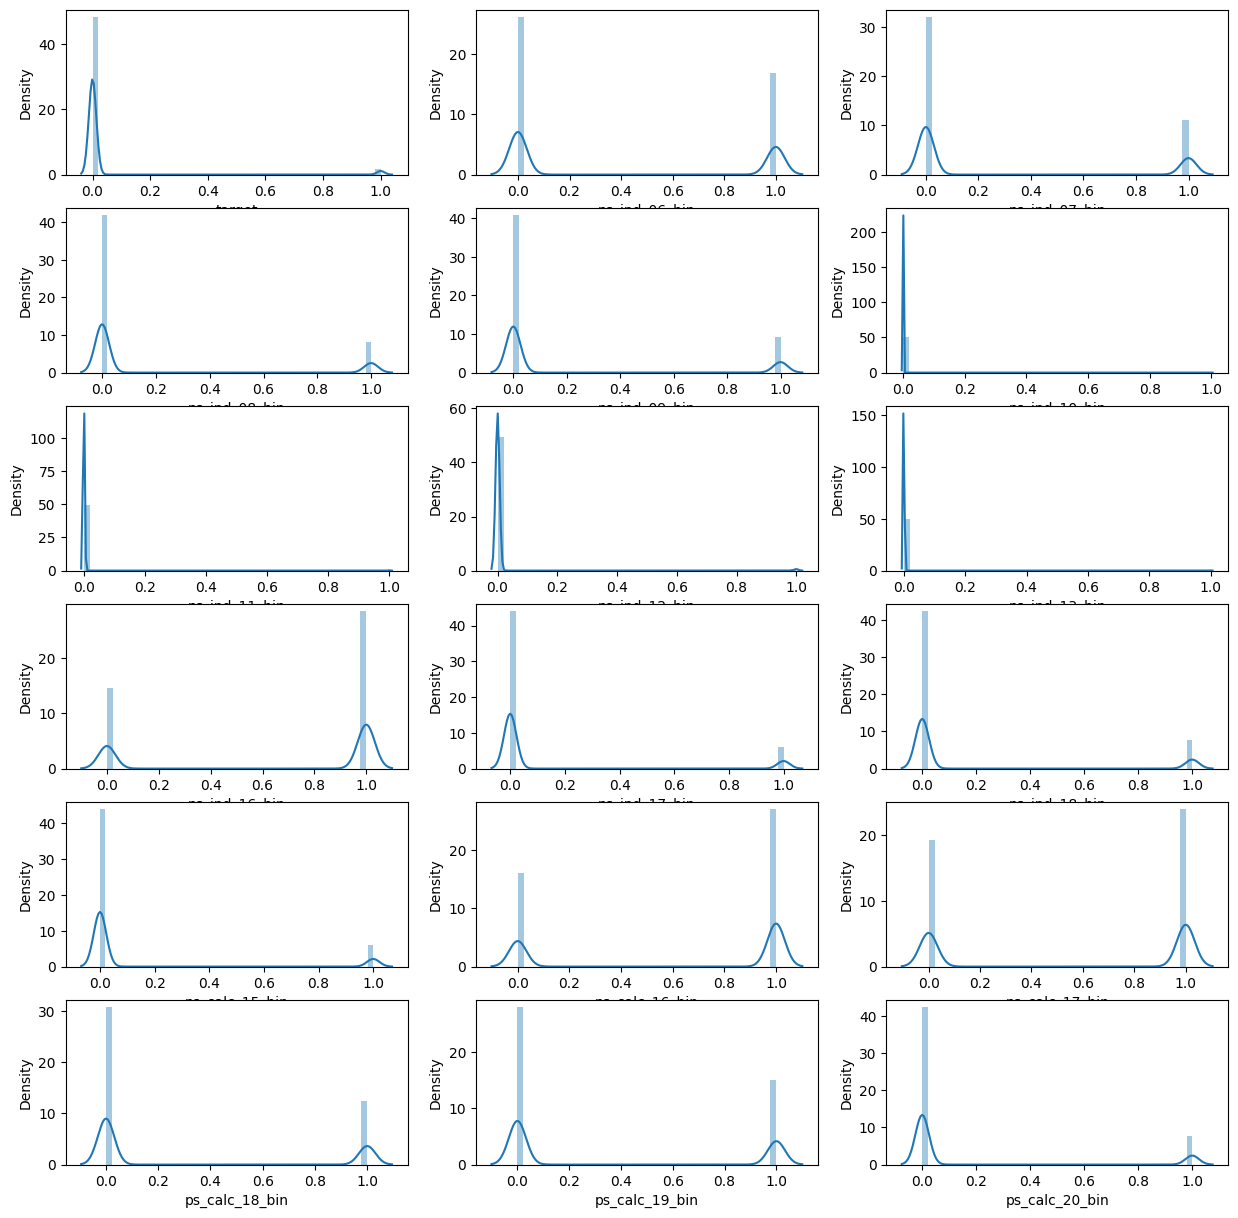

In [ ]:
#Frequency Distribution plot for Binary variables
count=1
plt.figure(figsize=(15,15))
for i in binary_var:
    plt.subplot(6,3,count)
    sns.distplot(data[i])
    count+=1

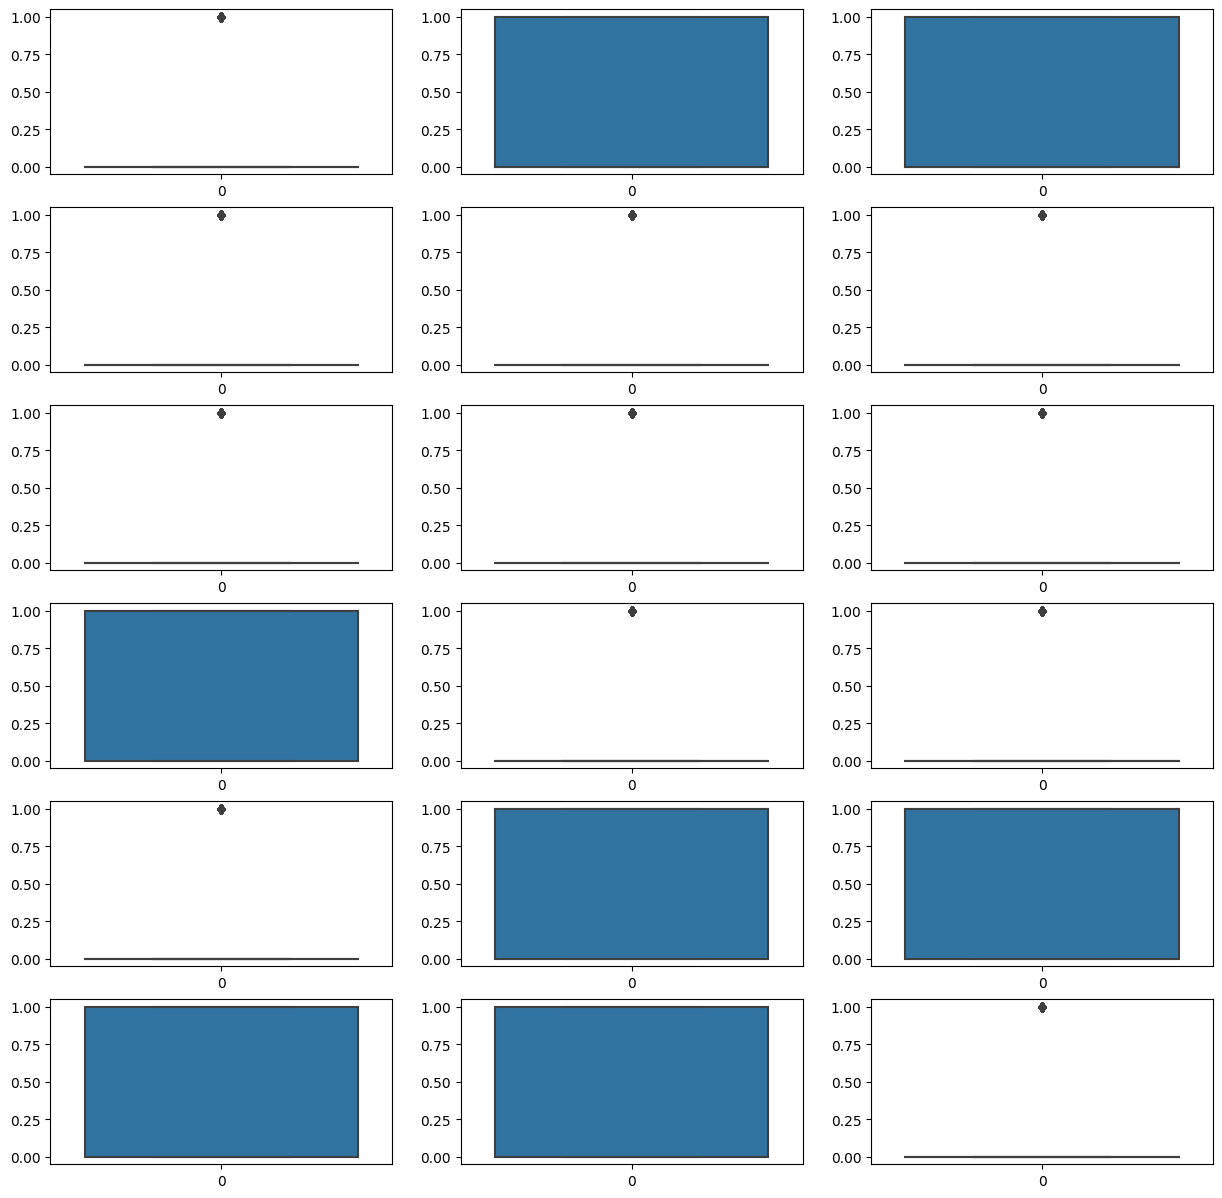

In [ ]:
#Boxplot for Binary variables
count=1
plt.figure(figsize=(15,15))
for i in binary_var:
    plt.subplot(6,3,count)
    sns.boxplot(data[i])
    count+=1

**Insight 2:**
        
        -In interval variables, **ps_reg_02** , *ps_reg_03*, *ps_car_12*, *ps_car_13*,*ps_car_14* and *ps_car_15* have outliers present in them, while remaining are outlier-free. Also, these are the variables that have skewed frequency distribution curve due to the presence of outliers.
        * In ordinal variables, except 4 variables, namely, *ps_ind_14*, *ps_ind_03*, *ps_ind_15*, *ps_calc_05* all the remaining ordinal variable have atleast one outliers. Hence, we can observe slight skewness in them from the frequency distribution curve.
        * In binary variables, since we only have two values (0 and 1), outlier analysis doesn't make much sense.

#### Check if the target data is proportionate or not. Hint: Below than 30% for binary data is sign of imbalance   

        No. The target data is not proportionate. As we can see above, target 1 ie: claims accepted is only 4%, which is less than
        30% indicating imbalance.

#### What should be the preferred way to in this case to balance the data?

       We will use SMOTE(Synthetic Minority Oversampling Technique) to balance the data.SMOTE works by selecting examples that are
       close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.



#### Which are the top two features in terms of missing values?

        In terms of missing values, we can see from the *null_percent_dict* that features *ps_car_03_cat* and *ps_car_05_cat* are the ones that
        have higher percentages of missing values compared to others.

#### In total, how many features have missing values?

In [ ]:
count = 0
non_null_features = []
for i in null_percent_dict:
    if null_percent_dict[i]!=0:
        count+=1
        non_null_features.append(i)
print('No. of features having missing values:',count)

No. of features having missing values: 12


#### What steps should be taken to handle the missing data?

        We will be filling missing values with the median value of the respective

In [ ]:
non_null_features

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_03_cat',
 'ps_car_05_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_14']

In [ ]:
for i in non_null_features:
    new_data[i] = new_data.fillna(new_data[i].median())[i]

In [ ]:
new_data.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


#### Which interval variables have strong correlation?  

In [ ]:
interval_corr_matrix = new_data[interval_var].corr()
target_corr_matrix = new_data[interval_var+['target']].corr().sort_values(by='target',ascending=False)['target']
target_corr_matrix

target        1.000000
ps_car_13     0.053899
ps_car_12     0.038800
ps_reg_02     0.034800
ps_reg_03     0.033344
ps_car_15     0.027667
ps_reg_01     0.022888
ps_car_14     0.011161
ps_calc_03    0.001907
ps_calc_01    0.001782
ps_calc_02    0.001360
Name: target, dtype: float64

In [ ]:
interval_corr_matrix

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
ps_reg_01,1.000000,0.471027,0.206868,0.018782,0.027097,-0.001912,0.002765,-0.000891,0.002194,-0.001538
ps_reg_02,0.471027,1.000000,0.728096,0.171453,0.194316,0.053362,0.054510,0.001347,-0.000770,0.000022
ps_reg_03,0.206868,0.728096,1.000000,0.203473,0.238886,0.075862,0.080780,0.000532,-0.000176,0.001517
ps_car_12,0.018782,0.171453,0.203473,1.000000,0.672014,0.577044,0.049740,-0.000721,-0.000393,0.000151
ps_car_13,0.027097,0.194316,0.238886,0.672014,1.000000,0.433587,0.529519,0.000157,0.000040,-0.000200
ps_car_14,-0.001912,0.053362,0.075862,0.577044,0.433587,1.000000,0.008842,-0.003159,-0.001804,-0.001065
ps_car_15,0.002765,0.054510,0.080780,0.049740,0.529519,0.008842,1.000000,0.000344,-0.000252,-0.001043
ps_calc_01,-0.000891,0.001347,0.000532,-0.000721,0.000157,-0.003159,0.000344,1.000000,-0.002418,0.000526
ps_calc_02,0.002194,-0.000770,-0.000176,-0.000393,0.000040,-0.001804,-0.000252,-0.002418,1.000000,0.002948
ps_calc_03,-0.001538,0.000022,0.001517,0.000151,-0.000200,-0.001065,-0.001043,0.000526,0.002948,1.000000


        * *ps_car_13*, *ps_car_12* and *ps_reg_02* are the top 3 features that exhibit strong correlation with the target variable.
        * In terms of correlation amongst interval features themselves *(ps_reg_02, ps_reg_03)* exhibit highest correlation,
        *(ps_car_12, ps_car_13, ps_car_14, ps_car_15)* and *(ps_reg_01, ps_reg_02)* exhibit medium level correlation.

#### What's the level of correlation among ordinal features?   

In [ ]:
ordinal_corr_matrix = new_data[ordinal_var].corr()
ordinal_corr_matrix

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
ps_ind_01,1.000000,0.223408,-0.024971,0.122137,0.008262,-9.430788e-04,-0.001171,0.000147,-0.000658,0.002993,-0.000085,-1.344982e-03,-0.001263,0.001521,0.000199,-0.000891
ps_ind_03,0.223408,1.000000,0.001990,0.170449,-0.059335,7.029223e-04,-0.001245,0.002361,0.001533,0.001267,-0.001544,2.302873e-04,-0.002716,-0.002352,0.000133,0.000205
ps_ind_14,-0.024971,0.001990,1.000000,-0.121547,0.004415,-1.102298e-03,0.000205,-0.000242,0.001023,0.004077,-0.001443,1.975748e-03,-0.000243,0.000284,0.000307,-0.000387
ps_ind_15,0.122137,0.170449,-0.121547,1.000000,0.023041,1.583613e-03,0.000874,0.000033,0.001721,-0.001309,-0.000985,-1.278706e-03,-0.001952,-0.001263,-0.000922,0.001348
ps_car_11,0.008262,-0.059335,0.004415,0.023041,1.000000,2.404439e-04,0.002456,-0.000242,-0.000330,-0.002432,-0.000476,-5.816562e-04,-0.001190,-0.001203,0.001160,0.000931
ps_calc_04,-0.000943,0.000703,-0.001102,0.001584,0.000240,1.000000e+00,0.000633,-0.001845,0.001445,-0.001847,-0.000038,5.835325e-08,0.000245,0.000978,-0.000215,0.001180
ps_calc_05,-0.001171,-0.001245,0.000205,0.000874,0.002456,6.326671e-04,1.000000,-0.001394,-0.002212,-0.001792,0.001154,-2.358151e-04,0.000387,-0.000212,0.000270,-0.000969
ps_calc_06,0.000147,0.002361,-0.000242,0.000033,-0.000242,-1.845321e-03,-0.001394,1.000000,-0.000075,-0.000603,0.001710,-1.534410e-03,-0.000575,0.000607,0.000974,-0.000870
ps_calc_07,-0.000658,0.001533,0.001023,0.001721,-0.000330,1.445124e-03,-0.002212,-0.000075,1.000000,-0.002085,0.000756,-5.302752e-04,-0.000109,-0.000389,-0.000599,0.001908
ps_calc_08,0.002993,0.001267,0.004077,-0.001309,-0.002432,-1.846555e-03,-0.001792,-0.000603,-0.002085,1.000000,0.000013,-2.665669e-03,0.002016,0.000109,-0.000304,-0.000171


        It appears that ordinal features in general are exhibiting very weak correlation among themselves.

#### Implement Hot Encoding for categorical features

In [ ]:
categorical_var

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [ ]:
one_hot_encoded_df_list = []
for i in categorical_var:
    one_hot_encoded_df_list.append(pd.get_dummies(new_data[i],prefix=i))
one_hot_encoded_df = pd.concat(one_hot_encoded_df_list,axis=1)

In [ ]:
one_hot_encoded_df.head()

,ps_ind_02_cat_1.0,ps_ind_02_cat_2.0,ps_ind_02_cat_3.0,ps_ind_02_cat_4.0,ps_ind_04_cat_0.0,ps_ind_04_cat_1.0,ps_ind_05_cat_0.0,ps_ind_05_cat_1.0,ps_ind_05_cat_2.0,ps_ind_05_cat_3.0,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### In nominal and interval features which features are suitable for StandardScaler?

        Here, since categorical features are already one-hot encoded. We will treat ordinal features as nominal ones and check
        the suitability of tandardScaling for nominal and interval features.

In [ ]:
nominal_interval_var = continuous_ordinal_var[1:]
new_data[nominal_interval_var]

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,...,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
0,2,5,0,11,0.7,0.2,0.718070,2.0,0.400000,0.883679,...,1,10,1,10,1,5,9,1,5,8
1,1,7,0,3,0.8,0.4,0.766078,3.0,0.316228,0.618817,...,1,9,5,8,1,7,3,1,1,9
2,5,9,0,12,0.0,0.0,0.801561,1.0,0.316228,0.641586,...,2,9,1,8,2,7,4,2,7,7
3,0,2,0,8,0.9,0.2,0.580948,1.0,0.374166,0.542949,...,4,7,1,8,4,2,2,2,4,9
4,0,0,0,9,0.7,0.6,0.840759,3.0,0.316070,0.565832,...,2,6,3,10,2,12,3,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,3,10,0,13,0.5,0.3,0.692820,3.0,0.374166,0.684631,...,0,9,0,9,1,12,4,1,9,6
595208,5,3,0,6,0.9,0.7,1.382027,2.0,0.387298,0.972145,...,4,8,6,8,2,12,4,1,3,8
595209,1,10,0,12,0.9,0.2,0.659071,3.0,0.397492,0.596373,...,2,7,4,8,0,10,3,2,2,6
595210,5,3,0,12,0.9,0.4,0.698212,3.0,0.374166,0.764434,...,0,9,4,9,2,11,4,1,4,2


        It appears that ordinal features are suitable for Standard Scaling since they have higher order of magnitude(about 10 times)
        than interval features.

In [ ]:
scaled_new_data = new_data.copy()
sc = StandardScaler()
scaled_new_data[ordinal_var] = sc.fit_transform(data[ordinal_var])

In [ ]:
scaled_new_data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,0.050218,2.0,0.213594,1.0,0.0,0,1,0,...,1.525425,-0.367359,1.255372,0.167831,0,1,1,0,0,1
1,9,0,-0.453868,1.0,0.954362,0.0,0.0,0,0,1,...,-1.046515,-0.367359,-1.104669,0.531911,0,1,1,0,1,0
2,13,0,1.562477,4.0,1.695130,1.0,0.0,0,0,1,...,-0.617858,0.463923,2.435393,-0.196249,0,1,1,0,1,0
3,16,0,-0.957955,1.0,-0.897559,0.0,0.0,1,0,0,...,-1.475171,0.463923,0.665362,0.531911,0,0,0,0,0,0
4,17,0,-0.957955,2.0,-1.638327,1.0,0.0,1,0,0,...,-1.046515,-0.367359,-1.104669,-1.652569,0,0,0,1,1,0


#### How many training records are there after achieving a balance of 12%?  

        We want minority classes(target 1) to be 12% of the majority classes(target 0). So, we will take sampling strategy to be 0.12.

In [ ]:
X = scaled_new_data.drop('target',axis=1)
Y = scaled_new_data['target']

In [ ]:
oversample = SMOTE(sampling_strategy = 0.12)
X, Y = oversample.fit_resample(X,Y)

In [ ]:
Counter(Y)

Counter({0: 573518, 1: 68822})

          So, we see that after achieving a balance of 12%, total number of training records becomes 573518+68822 = 642340 records.

In [ ]:
one_hot_encoded_df

,ps_ind_02_cat_1.0,ps_ind_02_cat_2.0,ps_ind_02_cat_3.0,ps_ind_02_cat_4.0,ps_ind_04_cat_0.0,ps_ind_04_cat_1.0,ps_ind_05_cat_0.0,ps_ind_05_cat_1.0,ps_ind_05_cat_2.0,ps_ind_05_cat_3.0,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
595208,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
595209,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
595210,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
one_hot_encoded_scaled_new_data = pd.concat([scaled_new_data, one_hot_encoded_df],axis=1)
one_hot_encoded_scaled_new_data = one_hot_encoded_scaled_new_data.drop(categorical_var,axis=1)

In [ ]:
one_hot_encoded_scaled_new_data.head()

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,7,0,0.050218,0.213594,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,-0.453868,0.954362,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13,0,1.562477,1.695130,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,0,-0.957955,-0.897559,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,17,0,-0.957955,-1.638327,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Summarize the learnings of ED.

        To summarize, we observe the following points about the data:
            * The data has very high number of features, making PCA suitable for dealing with it.
            * The target data is heavily imbalanced ie: claims are more likely rejected than accepted.
            * The features are mainly of three types: ordinal, interval and categorical types. We observed strong correlation in interval variables and weak correlation in ordinal variables.
            * We identified that nominal features in this case ordinal features are suitable for Standard Scaling.
            * Also, identified features are having outliers present and observed positive and negative skewness through frequency distribution plot.

### Modeling

#### PCA Dimensionality Reduction

In [ ]:
X_before_PCA = one_hot_encoded_scaled_new_data.drop(['id','target'],axis=1)
Y_before_PCA = one_hot_encoded_scaled_new_data['target']
pca = PCA()
X_after_PCA = pca.fit_transform(X_before_PCA)

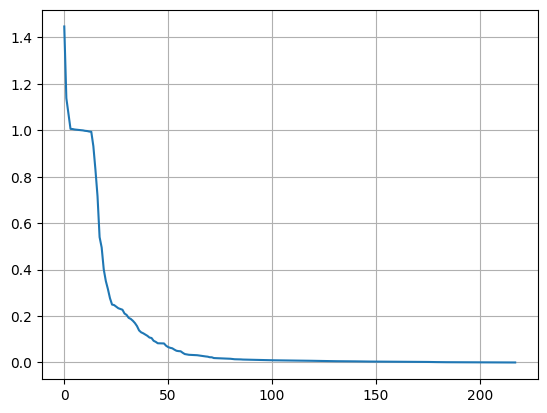

In [ ]:
#Scree Plot
plt.plot(pca.explained_variance_)
plt.grid()

From scree plot, it appears that about 50 features can be used while remaining can be eliminated as they have neglible explained varian-ce.

In [ ]:
pca = PCA(50)
X_after_PCA = pca.fit_transform(X_before_PCA)
Y = one_hot_encoded_scaled_new_data['target']
col_list = ['PCA'+str(i+1) for i in range(X_after_PCA.shape[1])]
X_after_PCA_df = pd.DataFrame(data = X_after_PCA, columns = col_list)

In [ ]:
X_after_PCA_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50
0,-0.521768,-0.215921,-0.255480,-2.000797,0.743685,-1.116277,-0.745647,-0.503097,0.064372,1.186751,...,-0.429518,-0.124805,0.142424,0.105250,-0.777914,-0.153679,-0.056886,0.232974,-0.111941,0.800457
1,0.346883,0.320767,0.588772,1.370336,-1.502913,-0.720217,-0.818865,0.353036,-1.254466,0.499414,...,0.028385,-0.117121,-0.180422,0.135047,0.126681,-0.212471,-0.223323,-0.055597,0.269412,0.034397
2,-2.650671,0.884208,-0.554959,-1.452568,0.728908,1.045396,-1.110725,0.677064,-0.369662,0.728105,...,-0.027739,-0.129690,-0.137723,0.094648,0.001554,-0.037208,-0.173424,0.266429,-0.288465,-0.262509
3,0.785283,0.771321,-1.941439,-0.562084,-1.135919,1.876237,1.225147,0.021992,1.135451,0.743092,...,-0.045918,-0.139552,-0.376826,0.209239,0.116226,0.217893,-0.096902,0.972531,0.044382,0.001764
4,1.303377,-1.610359,-0.396237,0.073708,-0.340673,0.590989,1.278235,0.767840,-1.278234,-0.674850,...,-0.019621,-0.120701,0.078739,0.151037,0.189894,-0.210574,-0.310401,-0.096535,-0.501955,-0.275998


#### Train Test split of data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_after_PCA_df,Y,test_size=0.2,random_state=0)

In [ ]:
X_train

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50
24433,-0.045038,-0.945616,0.125102,0.153660,2.183332,-0.225910,0.549334,-1.058284,0.813205,0.819516,...,-0.283210,-0.130123,0.079526,-0.829043,0.183060,-0.393591,-0.265941,0.034584,-0.176835,-0.185368
227637,-0.036134,0.959201,-1.220301,-1.641359,-0.395827,0.996694,1.247527,0.807725,-0.373423,1.164667,...,-0.370845,-0.138494,-0.206414,-0.161629,-0.048676,-0.099070,0.186280,0.474454,-0.333850,-0.014578
245461,0.536606,-0.410875,0.297094,0.445992,1.329229,-0.384768,1.205440,-1.007663,-0.479135,0.091395,...,-0.169388,-0.116289,-0.065016,-0.090307,-0.039195,-0.142304,-0.460788,-0.218753,0.397578,-0.109216
325281,-0.552148,3.503310,-0.398003,-1.052014,-1.390867,-0.562582,0.645030,1.627354,1.059306,-0.576839,...,-0.009606,-0.123975,-0.339329,0.300743,0.066607,0.475949,0.212388,-0.358504,-0.235786,0.139996
378468,-1.539148,-0.127873,1.360533,-0.459879,2.368233,0.510103,1.850990,-1.032652,0.299606,1.113099,...,-0.134131,0.875864,0.098611,0.044150,-0.052174,0.122216,0.164532,-0.233703,0.550605,-0.144215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,0.714902,-0.977499,-0.137083,-0.316565,-0.298317,-0.342157,0.750762,-1.159248,0.976158,-0.960011,...,1.037506,-0.129949,0.044676,-0.076064,-0.199259,0.306539,-0.344613,-0.201169,-0.187160,-0.134660
152315,-0.592465,-1.096769,0.016616,-0.691091,-0.548124,0.929837,0.016600,-0.037241,0.337350,-1.061923,...,-0.141896,-0.132568,-0.011250,0.048982,0.017651,-0.019737,0.260342,0.347613,-0.465891,-0.031517
117952,0.661024,-0.968631,-0.459122,1.687056,0.638766,0.437079,2.291022,-1.297030,-0.507690,-0.441300,...,0.152773,-0.119472,0.025645,0.037493,-0.009277,-0.379442,-0.118939,0.060039,-0.125661,-0.063805
435829,-1.065509,-0.771630,1.029264,-0.151978,-1.156050,-1.308050,0.121001,-0.317772,-0.868926,-0.149083,...,0.962474,-0.117747,-0.018475,0.168224,0.139770,0.144256,0.515861,-0.580028,-0.638494,0.378277


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Y_train_pred = log_reg.predict(X_train)
Y_test_pred = log_reg.predict(X_test)
print('Train accuracy score:',accuracy_score(Y_train, Y_train_pred))
print('Train F1 score:',f1_score(Y_train, Y_train_pred))
print('Test accuracy score:',accuracy_score(Y_test,Y_test_pred))
print('Test F1 score:',f1_score(Y_test,Y_test_pred))

Train accuracy score: 0.9634940535818165
Train F1 score: 0.0
Test accuracy score: 0.9637861949043622
Test F1 score: 0.0


#### The Simple Logistic Regression Model seems to have high accuracy. Is that what we need at all? What is the problem with this model? Why do you think f1 score is 0.0? What is the precision and recall score for the model? What is the most important inference you can draw from the result? What is the accuracy score and f1-score for the improved Logistic Regression model? Why do you think f1-score has improved?

        We see that accuracy of logistic regression model is high. But still it's a bad model because the f1-score is 0, which means that
        the model is unable to classify the minority classes (target 1). Let us check the confusion matrix to see whether this is true.  

Text(0.5, 23.52222222222222, 'Predicted')

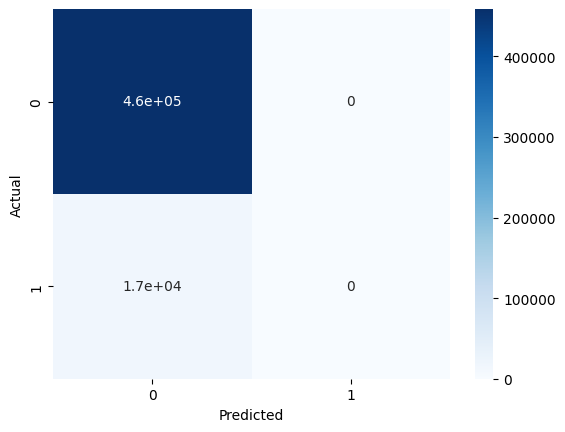

In [ ]:
sns.heatmap(confusion_matrix(Y_train,Y_train_pred),cmap='Blues',annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 23.52222222222222, 'Predicted')

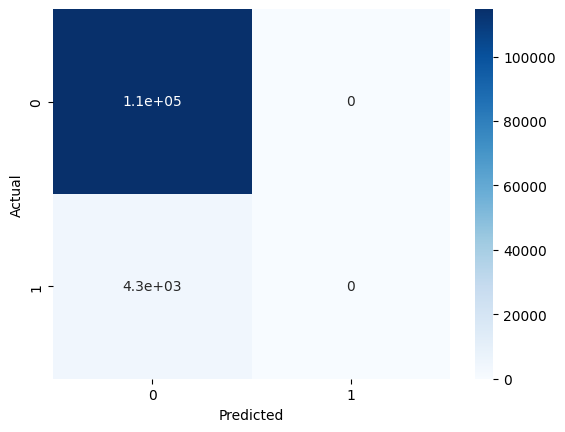

In [ ]:
sns.heatmap(confusion_matrix(Y_test,Y_test_pred),cmap='Blues',annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
print('Train precision score:',precision_score(Y_train, Y_train_pred))
print('Train recall score:',recall_score(Y_train,Y_train_pred))
print('Test precision score:',precision_score(Y_test,Y_test_pred))
print('Test recall score:',recall_score(Y_test,Y_test_pred))

Train precision score: 0.0
Train recall score: 0.0
Test precision score: 0.0
Test recall score: 0.0


**Inference:**

        So, one can infer this model cannot be used for production purposes, because it will fail to predict minority classes (target 1).
        We will try these three methods to improve the model.
            * Using Weighted Cost Function.
            * Using SMOTE to oversample minority classes.
            * Oversampling minority classes and undersampling majority classes.

#### Using Weighted Cost Function

In [ ]:
weighted_log_reg = LogisticRegression(class_weight='balanced')
weighted_log_reg.fit(X_train,Y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
Y_train_pred = weighted_log_reg.predict(X_train)
Y_test_pred = weighted_log_reg.predict(X_test)
print('Train accuracy score:',accuracy_score(Y_train, Y_train_pred))
print('Train F1 score:',f1_score(Y_train, Y_train_pred))
print('Test accuracy score:',accuracy_score(Y_test,Y_test_pred))
print('Test F1 score:',f1_score(Y_test,Y_test_pred))

Train accuracy score: 0.6172136363349987
Train F1 score: 0.09611560452857135
Test accuracy score: 0.6159370983594163
Test F1 score: 0.09368433572533005


Text(0.5, 23.52222222222222, 'Predicted')

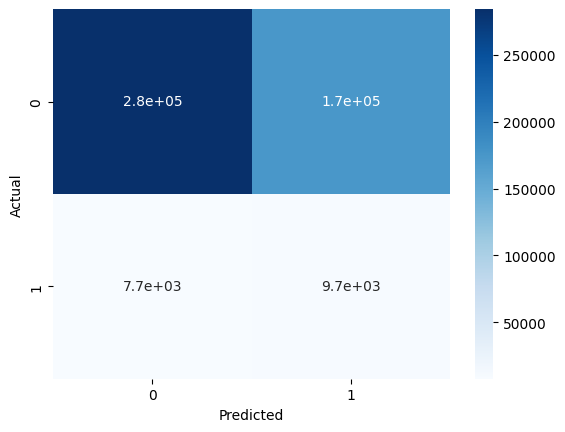

In [ ]:
sns.heatmap(confusion_matrix(Y_train,Y_train_pred),cmap='Blues',annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 23.52222222222222, 'Predicted')

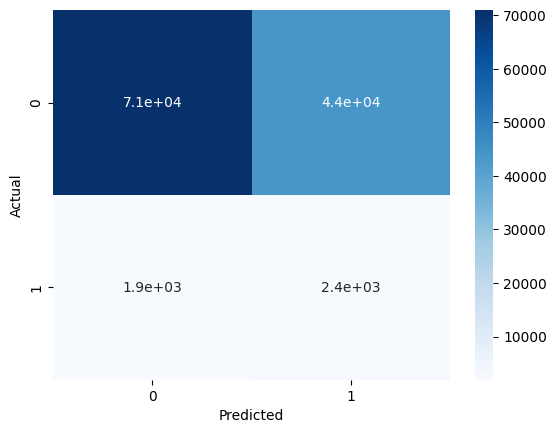

In [ ]:
sns.heatmap(confusion_matrix(Y_test,Y_test_pred),cmap='Blues',annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

          We see that F1-score has improved to some extent although not much. Some target 1 data has been predicted correctly.
          Also, accuracy has taken a hit because significant target 0 data have been predicted incorrectly This shows that there is some trade-off
          in accuracy and F1-score. We might need to explore improvements further.  

#### Using SMOTE to oversample minority classes.

In [ ]:
oversampler = SMOTE(sampling_strategy=0.2)
X, Y_oversampled = oversampler.fit_resample(X_after_PCA_df,Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_oversampled,test_size=0.2,random_state=0)

In [ ]:
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train,Y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
Y_train_pred = log_reg.predict(X_train)
Y_test_pred = log_reg.predict(X_test)
print('Train accuracy score:',accuracy_score(Y_train, Y_train_pred))
print('Train F1 score:',f1_score(Y_train, Y_train_pred))
print('Test accuracy score:',accuracy_score(Y_test,Y_test_pred))
print('Test F1 score:',f1_score(Y_test,Y_test_pred))

Train accuracy score: 0.5872686059690215
Train F1 score: 0.31590482154038824
Test accuracy score: 0.5876421228522649
Test F1 score: 0.3164284079823685


Text(0.5, 23.52222222222222, 'Predicted')

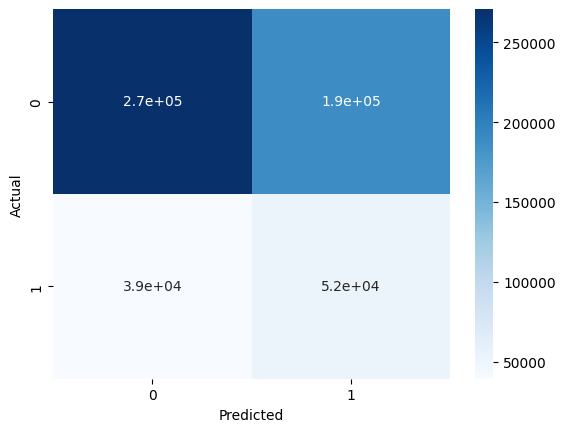

In [ ]:
sns.heatmap(confusion_matrix(Y_train,Y_train_pred),cmap='Blues',annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 23.52222222222222, 'Predicted')

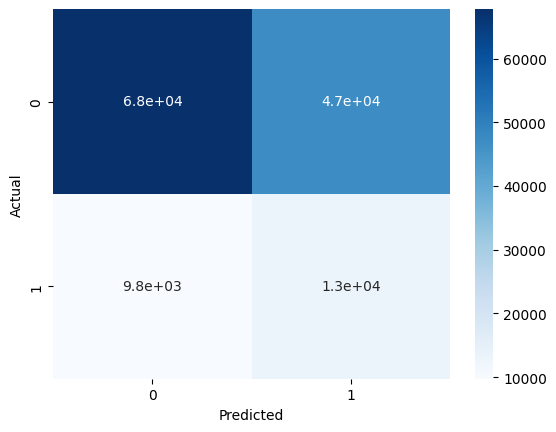

In [ ]:
sns.heatmap(confusion_matrix(Y_test,Y_test_pred),cmap='Blues',annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

        Oversampling using a sampling strategy of 0.2, ie: minority classes is 20% percent of the majority classes and using weighted cost function
        simultaneously has led to about 20% increase in the F1-score without any major dip in the accuracy part compared to previous model.

#### Oversampling minority classes and undersampling majority classes

In [ ]:
oversampler = SMOTE(sampling_strategy=0.2)
undersampler = RandomUnderSampler(sampling_strategy=0.7)
X, Y_over_under = oversampler.fit_resample(X_after_PCA_df,Y)
X, Y_over_under = undersampler.fit_resample(X,Y_over_under)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_over_under,test_size=0.2,random_state=0)

In [ ]:
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train,Y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
Y_train_pred = log_reg.predict(X_train)
Y_test_pred = log_reg.predict(X_test)
print('Train accuracy score:',accuracy_score(Y_train, Y_train_pred))
print('Train F1 score:',f1_score(Y_train, Y_train_pred))
print('Test accuracy score:',accuracy_score(Y_test,Y_test_pred))
print('Test F1 score:',f1_score(Y_test,Y_test_pred))

Train accuracy score: 0.582164764798004
Train F1 score: 0.5278838304711782
Test accuracy score: 0.586039165006372
Test F1 score: 0.532617286452528


Text(0.5, 23.52222222222222, 'Predicted')

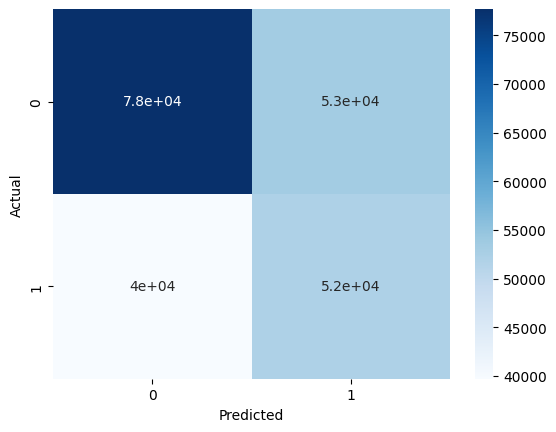

In [ ]:
sns.heatmap(confusion_matrix(Y_train,Y_train_pred),cmap='Blues',annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 23.52222222222222, 'Predicted')

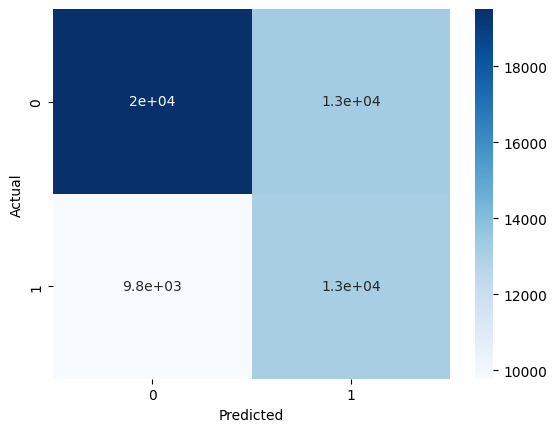

In [ ]:
sns.heatmap(confusion_matrix(Y_test,Y_test_pred),cmap='Blues',annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

        So, F1 score has improved a lot here. With more tuning to find optimum sampling strategy, we can definitely achieve a model with more F1-score and accuracy.
        The F1 score has improved because we are removing the imbalance through data augumentation of minority class(target 1).
        So, the model is easily able to identify discernible patterns, which are available more due to large amount of such minority data, resulting in better segregation.

#### For model LinearSVC play with parameters dual,  max_iter and see if there is any improvement. SVC with  Imbalance Check & Feature Optimization & only 100K  Records is there improvement in scores?

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_after_PCA_df,Y,test_size=0.2,random_state=0)

In [ ]:
lin_svc = LinearSVC()
lin_svc.fit(X_train, Y_train)

LinearSVC()

In [ ]:
Y_train_pred = lin_svc.predict(X_train)
Y_test_pred = lin_svc.predict(X_test)
print('Train accuracy score:',accuracy_score(Y_train,Y_train_pred))
print('Test accuracy score:',accuracy_score(Y_test,Y_test_pred))
print('Train F1-score:',f1_score(Y_train, Y_train_pred))
print('Test F1-score:',f1_score(Y_test,Y_test_pred))

Train accuracy score: 0.9634940535818165
Test accuracy score: 0.9637861949043622
Train F1-score: 0.0
Test F1-score: 0.0


        LinearSVC without any parameter tuning performs very poorly. The F1-score is 0.

In [ ]:
oversampler = SMOTE(sampling_strategy=0.3)
undersampler = RandomUnderSampler(sampling_strategy=0.5)
X,Y_over_under = oversampler.fit_resample(X_after_PCA_df,Y)
X,Y_over_under = undersampler.fit_resample(X,Y_over_under)

In [ ]:
#X_first_100k = []
#Y_first_100k = []
#true_count = 50000
#false_count = 50000
#i = 0
#x_inlist = X.values.tolist()
#while(true_count!=0 and false_count!=0):
#      if Y_over_under[i] == 0:
#         X_first_100k.append(x_inlist[:i])
#         Y_first_100k.append(Y[i])
#         i+=1
#         false_count-=1
#      if Y_over_under[i] == 1:
#         X_first_100k.append(x_inlist[:i])
#         Y_first_100k.append(Y[i])
#         i+=1
#         true_count-=1
#print(X_first_100k)
#X_first_100k = np.array(X_first_100k)
#Y_first_100k = np.array(Y_first_100k)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_over_under,test_size=0.2,random_state=0)

In [ ]:
lin_svc = LinearSVC(class_weight='balanced',dual=True,max_iter=5000)
lin_svc.fit(X_train, Y_train)
Y_train_pred = lin_svc.predict(X_train)
Y_test_pred = lin_svc.predict(X_test)
print('Train accuracy score:',accuracy_score(Y_train,Y_train_pred))
print('Test accuracy score:',accuracy_score(Y_test,Y_test_pred))
print('Train F1-score:',f1_score(Y_train, Y_train_pred))
print('Test F1-score:',f1_score(Y_test,Y_test_pred))

Train accuracy score: 0.5833890325767923
Test accuracy score: 0.582304108182461
Train F1-score: 0.4785297273702781
Test F1-score: 0.4780924715565238


#### XGBoost is one of the better classifiers but still f1-score is very low. What could be the reason?

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_over_under,test_size=0.2,random_state=0)

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
Y_train_pred = xgb.predict(X_train)
Y_test_pred = xgb.predict(X_test)
print('Train accuracy score:',accuracy_score(Y_train,Y_train_pred))
print('Test accuracy score:',accuracy_score(Y_test,Y_test_pred))
print('Train F1-score:',f1_score(Y_train, Y_train_pred))
print('Test F1-score:',f1_score(Y_test,Y_test_pred))

Train accuracy score: 0.9067182974436468
Test accuracy score: 0.9003419449207133
Train F1-score: 0.8377785358416825
Test F1-score: 0.8257924681658088


Text(0.5, 23.52222222222222, 'Predicted')

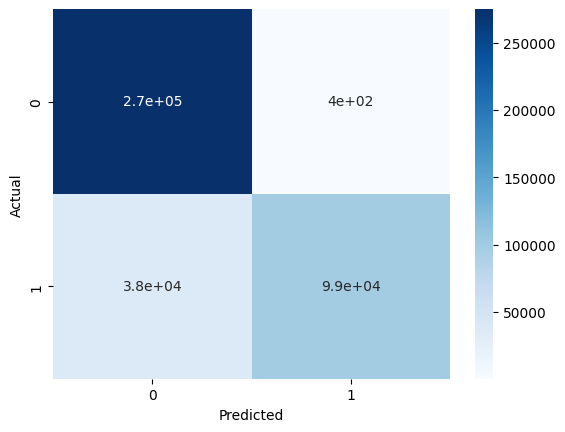

In [ ]:
sns.heatmap(confusion_matrix(Y_train,Y_train_pred),cmap='Blues',annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 23.52222222222222, 'Predicted')

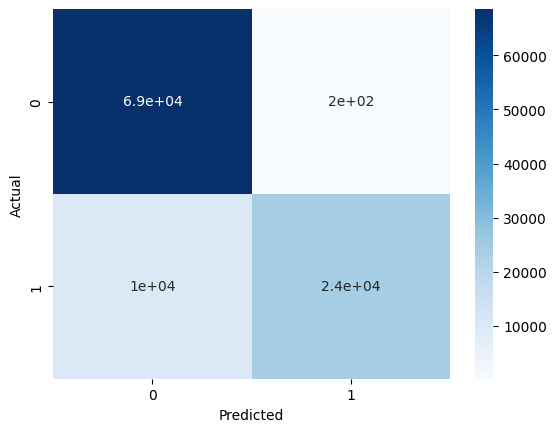

In [ ]:
sns.heatmap(confusion_matrix(Y_test,Y_test_pred),cmap='Blues',annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
print('Train precision score:',precision_score(Y_train, Y_train_pred))
print('Train recall score:',recall_score(Y_train,Y_train_pred))
print('Test precision score:',precision_score(Y_test,Y_test_pred))
print('Test recall score:',recall_score(Y_test,Y_test_pred))

Train precision score: 0.9960444226359166
Train recall score: 0.7229118818501613
Test precision score: 0.9916629387124324
Test recall score: 0.7074593089041692


        Through XGBoost, we are getting 0.82 as F1-score, which is definitely better than earlier classifier. But, still it's low.
        This is as observed above due to low recall score.

#### What is the increase in number of features after one-hot encoding of the data?

In [ ]:
features_increase_count = len(one_hot_encoded_scaled_new_data.columns)-len(new_data.columns)
print('Increase in the number of features after one-hot encoding:',features_increase_count)

Increase in the number of features after one-hot encoding: 161


#### Is there any improvement in scores after encoding?

        We have built model after one-hot encoding of data. So, we will built a logistic regression model for the data not having one-hot encoding and
        evaluate its performance with earlier ones.   

In [ ]:
#Using normal data without one-hot encoding
X = new_data.drop(['id','target'],axis=1)
sc = StandardScaler()
X[ordinal_var] = sc.fit_transform(X[ordinal_var])
pca = PCA()
X_label_encode_after_PCA  = pca.fit_transform(X)
Y = new_data['target']

In [ ]:
#PCA Dimensionality Reduction
n_components = 0
threshold = 95
variance_percent = 0
for i in pca.explained_variance_ratio_*100:
    if variance_percent>=95:
       break
    n_components+=1
    variance_percent+=i
pca = PCA(n_components)
X_label_encode_after_PCA  = pca.fit_transform(X)
Y = new_data['target']

In [ ]:
#Oversampling and Undersampling data
oversampler = SMOTE(sampling_strategy=0.3)
undersampler = RandomUnderSampler(sampling_strategy=0.5)
X_label_encode_after_PCA,Y_new = oversampler.fit_resample(X_label_encode_after_PCA,Y)
X_label_encode_after_PCA,Y_new = undersampler.fit_resample(X_label_encode_after_PCA,Y_new)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_label_encode_after_PCA,Y_new,test_size=0.2,random_state=0)

In [ ]:
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train,Y_train)
Y_train_pred = log_reg.predict(X_train)
Y_test_pred = log_reg.predict(X_test)
print('Train accuracy score:',accuracy_score(Y_train, Y_train_pred))
print('Train F1 score:',f1_score(Y_train, Y_train_pred))
print('Test accuracy score:',accuracy_score(Y_test,Y_test_pred))
print('Test F1 score:',f1_score(Y_test,Y_test_pred))

Train accuracy score: 0.5050686311547664
Train F1 score: 0.4167919892474653
Test accuracy score: 0.5066209448529055
Test F1 score: 0.41905717837874834


In [ ]:
print('Train precision score:',precision_score(Y_train, Y_train_pred))
print('Train recall score:',recall_score(Y_train,Y_train_pred))
print('Test precision score:',precision_score(Y_test,Y_test_pred))
print('Test recall score:',recall_score(Y_test,Y_test_pred))

Train precision score: 0.3431105848967069
Train recall score: 0.5307730325319069
Test precision score: 0.34526181257752886
Test recall score: 0.5329735689209969


So, it was observed that the model performs worse without one-hot encoding compared to one-hot encoding. Before one-hot encoding, the test F1-score of logistic regression is 0.31 but after one-hot encoding, the score is 0.42 i.e: about 11% increase in the F1-score.

#### If not missing a positive sample is the priority which model is best so far?

XGBoost is the best model obtained so far if not missing a positive sample is a priority due to very high precision i.e: 99.95%, which means out of total predicted positives 99.95% is correct.

#### If not marking negative sample as positive is top priority, which model is best so far?

        A Simple Logistic Regression Model without oversampling and undersampling is the best model if not marking negative sample as positive
        is the priority. per class accuracy for target 0 is 100%, which 0% for target 1.

#### Do you think using AdaBoost can give any significant improvement over XGBoost?

        We will use AdaBoost model and evaluate its performance and compare it with the XGBoost.

In [ ]:
oversampler = SMOTE(sampling_strategy=0.3)
undersampler = RandomUnderSampler(sampling_strategy=0.5)
X,Y_over_under = oversampler.fit_resample(X_after_PCA_df,Y)
X,Y_over_under = undersampler.fit_resample(X,Y_over_under)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_over_under,test_size=0.2,random_state=0)

In [ ]:
ada_model = AdaBoostClassifier(random_state=0,n_estimators=100)
ada_model.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
Y_train_pred = ada_model.predict(X_train)
Y_test_pred = ada_model.predict(X_test)
print('Train accuracy score:',accuracy_score(Y_train, Y_train_pred))
print('Train F1 score:',f1_score(Y_train, Y_train_pred))
print('Test accuracy score:',accuracy_score(Y_test,Y_test_pred))
print('Test F1 score:',f1_score(Y_test,Y_test_pred))

Train accuracy score: 0.8799705520521539
Train F1 score: 0.7845830218528885
Test accuracy score: 0.8780913080119729
Test F1 score: 0.781423137711239


In [ ]:
print('Train precision score:',precision_score(Y_train, Y_train_pred))
print('Train recall score:',recall_score(Y_train,Y_train_pred))
print('Test precision score:',precision_score(Y_test,Y_test_pred))
print('Test recall score:',recall_score(Y_test,Y_test_pred))

Train precision score: 0.975825981664072
Train recall score: 0.6560165130680001
Test precision score: 0.9734314149718737
Test recall score: 0.6526822758000406


        Precision-wise, XGBoost model is better than AdaBoost by about 2%. But, Recall-wise, the latter one is slightly better.
        Overall, XGBoost is better and faster than Adaboost.

#### MLPClassifier is the neural network we are trying. But how to choose the right no. of layers and size? At what layer size we get the best f1-score?

In [ ]:
param = {'hidden_layer_sizes':[(100,),(20,20,),(20,20,20,)],'random_state':[0]}
mlp_nn = MLPClassifier()
mlp_nn_gridsearch = GridSearchCV(mlp_nn,param_grid=param,n_jobs=-1,scoring='f1')
mlp_nn_gridsearch.fit(X_train,Y_train)

GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(100,), (20, 20), (20, 20, 20)],
                         'random_state': [0]},
             scoring='f1')

In [ ]:
print('Best Paramater for Multi-Layer Perceptron:',mlp_nn_gridsearch.best_params_)

Best Paramater for Multi-Layer Perceptron: {'hidden_layer_sizes': (100,), 'random_state': 0}


For hidden layer size of 100, we get the best F1-score.

In [ ]:
mlp_nn = MLPClassifier(hidden_layer_sizes=(100,),random_state=0)
mlp_nn.fit(X_train,Y_train)
Y_train_pred = mlp_nn.predict(X_train)
Y_test_pred = mlp_nn.predict(X_test)
print('Train accuracy score:',accuracy_score(Y_train, Y_train_pred))
print('Train F1 score:',f1_score(Y_train, Y_train_pred))
print('Test accuracy score:',accuracy_score(Y_test,Y_test_pred))
print('Test F1 score:',f1_score(Y_test,Y_test_pred))

Train accuracy score: 0.9192917962279503
Train F1 score: 0.870920139897517
Test accuracy score: 0.9110846337895828
Test F1 score: 0.8582065343322778


        So, MLP Classifier does have a good F1-score and accuracy score compared to AdaBoost Classifier and XGBoost Classifier ie: